In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Hotel Guest Booking and Preference Data
    
    This dataset is from hotel data, This dataset includes information on occupancy rates room prices, and guest demographics, which can be used to identify trends and make informed business decisions.  By analyzing this hotel data, we can understand customer preferences, optimize pricing strategies, and improve the overall guest experience

In [2]:
# MAIN DATA SET VARIABLE
df_book = pd.read_csv('dateset/hotel_bookings.csv', header=0)  
display(df_book.head()) 

num_rows, num_columns = df_book.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns) 
plt.style.use('fivethirtyeight') 
# df_hr.dtypes 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Number of rows: 119390
Number of columns: 32


# Adding columns

In [3]:

df_book['date_status'] = pd.to_datetime(df_book['reservation_status_date']) 
# df_book.dtypes 
df_book['date_status'] = df_book['date_status'].dt.strftime('%B') 
# df_book['date_status']

# FUNCTION CELL
    
    SINCE IT THE MONTH ARE UNORDER I FIND SOME FUCKING SOLUtioN TO SOLVE THIS ONE
    

In [24]:
montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
# montly = df_book.pivot_table(values= "hotel" , index=None, aggfunc='mean'  )
df_motly = pd.DataFrame(montly) 
df_motly = df_motly.reset_index()  
# display(df_motly)

def func_ordering(unorder_item) :
    #initialize the order and the dataframe might use
    order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
    tb_ordered = pd.DataFrame([{
        'arrival_date_month' : '', 
        'hotel' : '' 
    }])
    
    for order in order_month:
        querys = unorder_item.query("arrival_date_month ==  @order " )
        # querys = querys.reset_index()
        tb_ordered = pd.concat([tb_ordered , querys] , ignore_index=True)

    # DELETE THE empty table adn indexx
    tb_ordered= tb_ordered.query("hotel != ''").reset_index(drop=True)
    # tb_ordered = tb_ordered.set_index('arrival_date_month') 
    # display(tb_ordered)  
    return tb_ordered 


def func_ordering_dateS(unorder_item) :
    # for x in order
    order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
    tb_ordered = pd.DataFrame([{
        
        'Canceled' : '' ,
        'Check-Out'  : '' , 
        'No-Show' : '' , 
        'date_status' : ''
     
    }])   

    for order in order_month:
        querys = unorder_item.query("date_status ==  @order " )
        # querys = querys.reset_index()
        tb_ordered = pd.concat([tb_ordered , querys] , ignore_index=True)

    # DELETE THE empty table adn indexx
    tb_ordered= tb_ordered.query("date_status != ''").reset_index(drop=True)
    # tb_ordered = tb_ordered.set_index('arrival_date_month') 
    # display(tb_ordered)  
    return tb_ordered 


def func_ordering_dateS_v2(unorder_item) :
    # for x in order
    order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
    tb_ordered = pd.DataFrame([{

        'date_status' :  '' , 
        'Canceled' : '' ,
        'Check-Out'  : '' , 
        'No-Show' : '' 
        # 'date_status' : ''
     
    }])   

    for order in order_month:
        querys = unorder_item.query("date_status ==  @order " )
        # querys = querys.reset_index()
        tb_ordered = pd.concat([tb_ordered , querys] , ignore_index=True)

    # DELETE THE empty table adn indexx
    tb_ordered= tb_ordered.query("date_status != ''").reset_index(drop=True)
    # tb_ordered = tb_ordered.set_index('arrival_date_month') 
    # display(tb_ordered)  
    return tb_ordered 



def custom_autopct(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''


# filter city vs resort

In [25]:
# QUERY RIGHT FILTER TO City Hotel VS Resort Hotel

filter_book_city = df_book[df_book['hotel'] == 'City Hotel' ]
filter_book_resort = df_book[df_book['hotel'] == 'Resort Hotel']  

filter_city = filter_book_city
filter_resort = filter_book_resort


greyn = '#66cdaa'  
greyn_01 = '#318884'
greyn_02 = '#72bdcd'

greyn_main = '#66cdaa'
# greyn_01 = '#3C6B66'
# greyn_02 = '#99FF99'

In [6]:



# montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
# df_motly = pd.DataFrame(montly)
# df_motly

# plt.style.use('ggplot')
# plt.bar(df_motly.index ,  df_motly['hotel'] , width=0.7)
# plt.title("Months")
# plt.xticks(rotation=45)
# plt.subplots_adjust(wspace= 200)
# plt.show()


# tb_arrival = func_ordering(df_motly) 
# greyn = '#66cdaa'
# ## Vizualising this shit now  
# plt.style.use('ggplot')
# plt.bar(tb_arrival['arrival_date_month'] ,  tb_arrival['hotel'] , color=greyn , width=0.7)
# plt.title("Months")
# plt.xticks(rotation=45)
# plt.subplots_adjust(wspace= 200)
# plt.show()



reservation_status,hotel,Canceled,Check-Out,No-Show
0,City Hotel,32186,46228,916
1,Resort Hotel,10831,28938,291


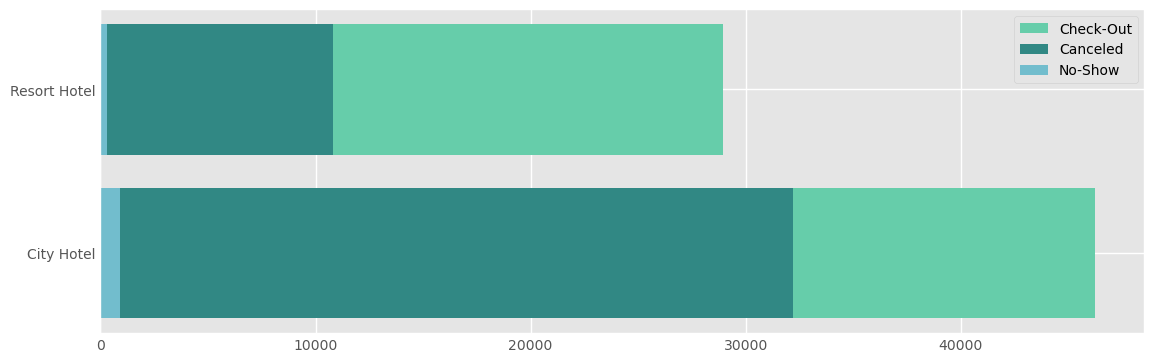

In [26]:
fig, ax = plt.subplots(1, 1 , figsize=(12,4)) 

df_book.head()
tb_reservation = df_book.pivot_table(index='hotel' ,  values='is_canceled' , columns='reservation_status' , aggfunc='count').reset_index() 
tb_reservation

# tb_reservation = df_book.pivot_table(index='')
# tb_reservation['Total'] =  tb_reservation['City Hotel'] + tb_reservation['Resort Hotel'] 
display(tb_reservation)
plt.barh(tb_reservation['hotel'] ,  tb_reservation['Check-Out'] , label='Check-Out' , color=greyn_main , )   
plt.barh(tb_reservation['hotel'] , tb_reservation['Canceled'] , label='Canceled'  , color=greyn_01 , )   
plt.barh(tb_reservation['hotel'] , tb_reservation['No-Show'] , label='No-Show'  , color=greyn_02 , ) 
ax.legend(loc='upper right') 


In [8]:
# montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
df_book

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,July
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,July
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,July
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,September
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,September
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,September
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,September


hotel,customer_type,City Hotel,Resort Hotel,c_rank,c_sum,c_exlod,r_rank,r_sum,r_exlod
0,Contract,2300,1776,3.0,10.0,0.2,3.0,10.0,0.2
1,Group,293,284,4.0,10.0,0.3,4.0,10.0,0.3
2,Transient,59404,30209,1.0,10.0,0.0,1.0,10.0,0.0
3,Transient-Party,17333,7791,2.0,10.0,0.1,2.0,10.0,0.1


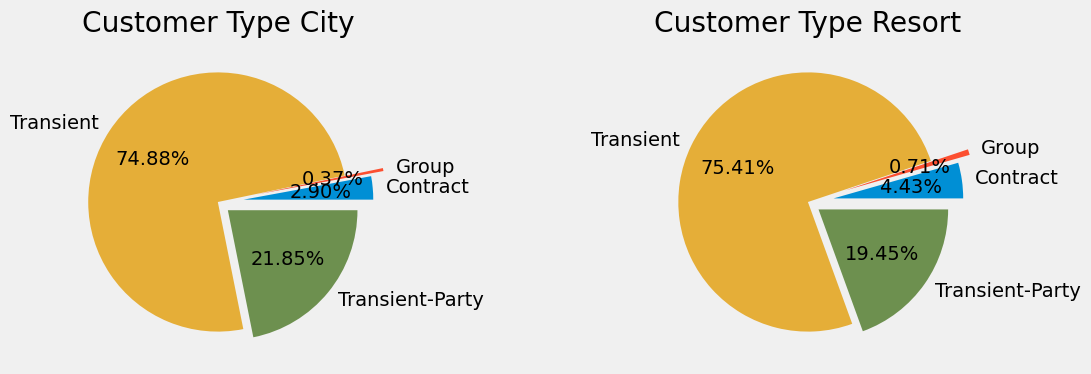

In [9]:
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3)
# fig, ax = plt.subplots(1 ,2  , figsize =( 8, 3 ) ) 

# tb_reservation = df_book.pivot_table(index='date_status'  , values='hotel' , columns='reservation_status' , aggfunc='count') 

tb_customertype  = df_book.pivot_table(index='customer_type' , values='is_canceled' ,  columns='hotel' , aggfunc='count').reset_index()

# adding rank for explosion parang aangat ko sila base sa  percentage at base
#  City Ranknig 
tb_customertype['c_rank'] = tb_customertype['City Hotel'].rank(ascending=False) 
tb_customertype['c_sum'] = tb_customertype['c_rank'].sum()
tb_customertype['c_exlod'] = (tb_customertype['c_rank'] / tb_customertype['c_sum'] ) - 0.1

# RESORT rankgin
tb_customertype['r_rank'] = tb_customertype['Resort Hotel'].rank(ascending=False) 
tb_customertype['r_sum'] = tb_customertype['r_rank'].sum() 
tb_customertype['r_exlod'] = (tb_customertype['r_rank'] / tb_customertype['r_sum'] ) - 0.1


display(tb_customertype)
ax[0].pie( tb_customertype['City Hotel'] , labels=tb_customertype['customer_type']  , explode=tb_customertype['c_exlod'] , autopct="%1.2f%%")  
ax[1].pie( tb_customertype['Resort Hotel'] , labels=tb_customertype['customer_type']  , explode=tb_customertype['r_exlod'] , autopct="%1.2f%%") 
# ax[1].pie( tb_market_seg['Resort Hotel'] , labels=tb_market_seg['market_segment']  )  


# tb_room_city['Check-Out'] = tb_room_city['Check-Out'].fillna(0) 
# print(tb_room_city['Check-Out'].isna().sum())   
# ax.pie(tb_room_city['Check-Out']    , labels=tb_room_city['assigned_room_type'] ,  autopct='%1.1f%%' ) 
 
# ax[1].bar(tb_customertype.index,  tb_customertype['hotel'] , color=greyn , width=0.7)
ax[0].set_title('Customer Type City')
ax[1].set_title('Customer Type Resort') 
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()   



hotel,market_segment,City Hotel,Resort Hotel,c_sum,c_rate,c_rank,r_rank,sum,c_explod,r_explod
0,Aviation,237.0,0.0,79330.0,0.002988,7.0,7.5,36.0,0.194444,0.208333
1,Complementary,542.0,201.0,79330.0,0.006832,6.0,6.0,36.0,0.166667,0.166667
2,Corporate,2986.0,2309.0,79330.0,0.037640,5.0,5.0,36.0,0.138889,0.138889
3,Direct,6093.0,6513.0,79330.0,0.076806,4.0,3.0,36.0,0.111111,0.083333
4,Groups,13975.0,5836.0,79330.0,0.176163,3.0,4.0,36.0,0.083333,0.111111
5,Offline TA/TO,16747.0,7472.0,79330.0,0.211106,2.0,2.0,36.0,0.055556,0.055556
6,Online TA,38748.0,17729.0,79330.0,0.488441,1.0,1.0,36.0,0.027778,0.027778
7,Undefined,2.0,0.0,79330.0,0.000025,8.0,7.5,36.0,0.222222,0.208333


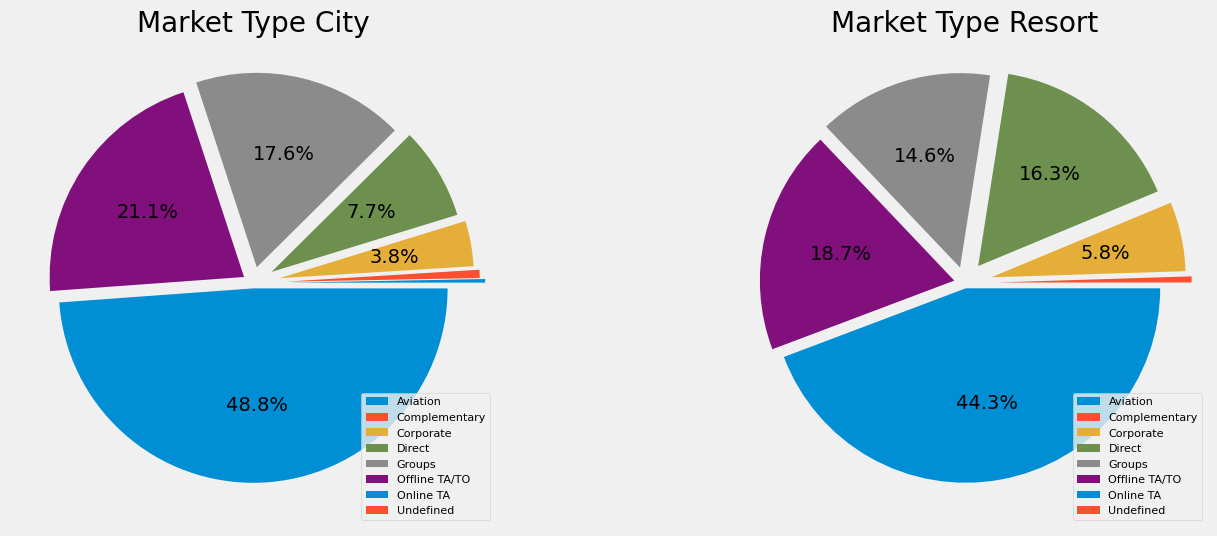

In [10]:
fig, ax = plt.subplots(1, 2 , figsize=(15,6)) 
# plt.subplots_adjust(wspace=0.3)

tb_market_seg = df_book.pivot_table(index='market_segment' ,  values='is_canceled' , columns='hotel' , aggfunc='count').reset_index()
tb_market_seg['City Hotel'] = tb_market_seg['City Hotel'].fillna(0) 
tb_market_seg['Resort Hotel'] = tb_market_seg['Resort Hotel'].fillna(0) 
tb_market_seg['c_sum'] = tb_market_seg['City Hotel'].sum() 
tb_market_seg['c_rate'] = tb_market_seg['City Hotel']  / tb_market_seg['c_sum']


tb_market_seg['c_rank'] = tb_market_seg['City Hotel'].rank(ascending=False) 
tb_market_seg['r_rank'] = tb_market_seg['Resort Hotel'].rank(ascending=False)
tb_market_seg['sum'] = tb_market_seg['c_rank'].sum()
tb_market_seg['c_explod'] =  ( tb_market_seg['c_rank'] /  tb_market_seg['sum'] ) 
tb_market_seg['r_explod'] =  ( tb_market_seg['r_rank'] /  tb_market_seg['sum'] )

display(tb_market_seg)  
# ax[0].pie( tb_customertype['City Hotel'] , labels=tb_customertype['customer_type']  , explode=tb_customertype['c_exlod'] , autopct="%1.2f%%")  

# ax[0].pie(tb_market_seg['City Hotel']  , autopct='%0.00f%%', explode=tb_market_seg['c_explod'])
ax[0].pie(tb_market_seg['City Hotel']  , autopct=custom_autopct , explode=tb_market_seg['c_explod'])
ax[1].pie(tb_market_seg['Resort Hotel']  , autopct=custom_autopct , explode=tb_market_seg['c_explod'])
ax[0].set_title('Market Type City')
ax[1].set_title('Market Type Resort')
ax[0].legend(tb_market_seg['market_segment'] , loc='lower right' ,   fontsize=8 )
ax[1].legend(tb_market_seg['market_segment'] , loc='lower right' ,  fontsize=8 )
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()   




In [11]:
# fig, ax = plt.subplots(1, 5 , figsize=(15,6)) 
# ax[2].pie(tb_market_seg['Resort Hotel']  , autopct=custom_autopct , explode=tb_market_seg['c_explod'] )
# ax[2].legend(tb_market_seg['market_segment'] , loc='lower right').get_frame().set_facecolor('white') 

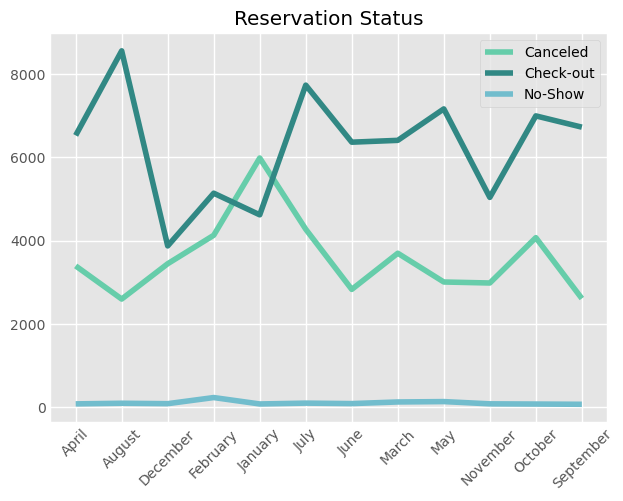

In [12]:
# df_book.pivot_table(values='hotel'  , columns='market_segment' , aggfunc='count')   
tb_reservation = df_book.pivot_table(index='date_status'  , values='hotel' , columns='reservation_status' , aggfunc='count') 

tb_reservation

## Vizualising this shit now
plt.style.use('ggplot')
plt.plot(tb_reservation.index , tb_reservation['Canceled'] , color=greyn_main  , label='Canceled' )
plt.plot(tb_reservation.index , tb_reservation['Check-Out'] , color=greyn_01  , label='Check-out' )
plt.plot(tb_reservation.index , tb_reservation['No-Show'] , color=greyn_02 , label='No-Show'  )
plt.legend() 
# plt.plot(tb_reservation.index , tb_reservation['Canceled'] , color=greyn  )
plt.title("Reservation Status")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show() 

 

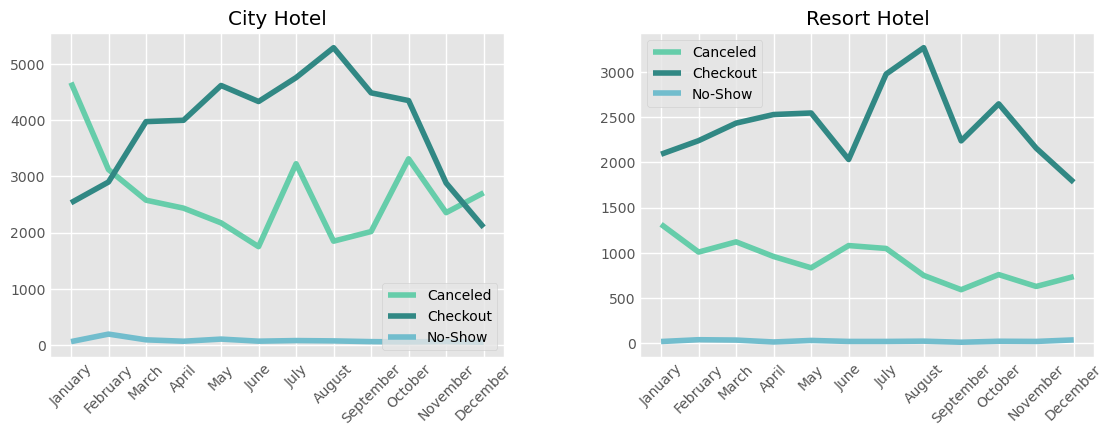

In [13]:
# tb_reservation = df_book.pivot_table(index='reservation_status_date'  , values='hotel' , columns='reservation_status' , aggfunc='count') 

# df['date_status'] = pd.to_datetime(df_book['reservation_status_date'] , format='%d-%m/%Y') 
df_book['date_status'] = pd.to_datetime(df_book['reservation_status_date']) 
# df_book.dtypes 
df_book['date_status'] = df_book['date_status'].dt.strftime('%B') 
df_book['date_status'] 



tb_reservation_resort = filter_book_resort.pivot_table(index='date_status'  , values='hotel' , columns=['reservation_status']   , aggfunc='count').reset_index()
tb_reservation_city = filter_book_city.pivot_table(index='date_status'  , values='hotel' , columns=['reservation_status']   , aggfunc='count').reset_index()
# tb_reservation_city['Canceled'] = tb_reservation_city['Canceled'].astype(str)

# display(tb_reservation_city)
tb_reservation_city = func_ordering_dateS_v2(tb_reservation_city)
tb_reservation_resort = func_ordering_dateS_v2(tb_reservation_resort)

# display(tb_reservation_city)
# display(tb_reservation_city)
# display(tb_reservation_city.dtypes) 
# display(tb_reservation_resort.head())  
 
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3) 

ax[0].plot(tb_reservation_city['date_status'] ,  tb_reservation_city['Canceled'] , color=greyn_main  , label='Canceled'  ) 
ax[0].plot(tb_reservation_city['date_status'] ,  tb_reservation_city['Check-Out'] , color=greyn_01, label='Checkout' ) 
ax[0].plot(tb_reservation_city['date_status'] ,  tb_reservation_city['No-Show'] , color=greyn_02, label='No-Show'  )  
ax[0].set_title('City Hotel') 
ax[1].plot(tb_reservation_resort['date_status'] ,  tb_reservation_resort['Canceled'] , color=greyn_main  , label='Canceled'  ) 
ax[1].plot(tb_reservation_resort['date_status'] ,  tb_reservation_resort['Check-Out'] , color=greyn_01, label='Checkout' ) 
ax[1].plot(tb_reservation_resort['date_status'] ,  tb_reservation_resort['No-Show'] , color=greyn_02, label='No-Show'  )  
# ax[1].plot(tb_customertype.index,  tb_customertype['hotel'] , color=greyn )
ax[1].set_title('Resort Hotel') 
# plt.xticks(rotation=45)
ax[0].tick_params(axis='x', which='both', labelrotation=45)
ax[1].tick_params(axis='x', which='both', labelrotation=45)
ax[0].legend(loc='lower right') 
ax[1].legend() 


# ax[1].set_title('Customer Type')


,arrival_date_month,hotel,Canceled,Check-Out,No-Show,mean
0,January,NaN,118982.21,185190.07,4529.61,407368.641667
1,February,NaN,144218.58,264064.79,14179.93,407368.641667
2,March,NaN,222392.89,367175.18,8721.17,407368.641667
3,April,NaN,375537.33,449105.15,7521.27,407368.641667
4,May,NaN,437451.38,551521.51,12355.74,407368.641667
5,June,NaN,418616.22,513887.26,7469.37,407368.641667
6,July,NaN,334786.01,552626.14,8206.80,407368.641667
7,August,NaN,384899.66,637175.42,8099.45,407368.641667
8,September,NaN,323856.50,483047.36,7130.63,407368.641667
9,October,NaN,313352.12,441272.21,5681.73,407368.641667


,arrival_date_month,hotel,Canceled,Check-Out,No-Show,mean
0,January,NaN,16565.34,90988.26,916.31,218937.6025
1,February,NaN,44056.36,124972.38,2169.76,218937.6025
2,March,NaN,43506.87,146693.13,1687.21,218937.6025
3,April,NaN,86522.08,193462.93,973.82,218937.6025
4,May,NaN,83662.08,194326.91,2311.21,218937.6025
5,June,NaN,114187.59,219944.77,2171.90,218937.6025
6,July,NaN,235495.14,470934.37,3214.57,218937.6025
7,August,NaN,319592.96,590187.59,4372.52,218937.6025
8,September,NaN,85868.29,202668.24,1290.78,218937.6025
9,October,NaN,60450.37,159071.78,1234.88,218937.6025


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

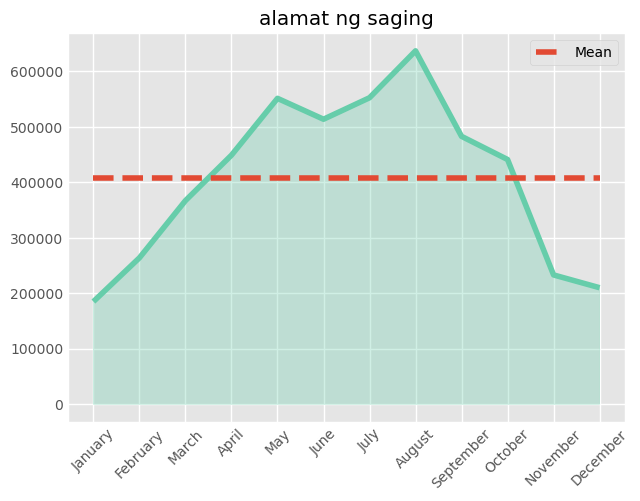

In [14]:
# tb_resort = df_book[df_book['hotel'] = 'City Hotel']

tb_arrival_city = filter_book_city.pivot_table(index='arrival_date_month' , values='adr' , columns='reservation_status', aggfunc='sum')
tb_arrival_city = tb_arrival_city.reset_index()  
tb_arrival_city = func_ordering(tb_arrival_city) 
tb_arrival_city['mean'] = tb_arrival_city['Check-Out'].mean()
display(tb_arrival_city)

tb_arrival_resort = filter_book_resort.pivot_table(index='arrival_date_month' , values='adr' , columns='reservation_status', aggfunc='sum')
tb_arrival_resort = tb_arrival_resort.reset_index()  
tb_arrival_resort = func_ordering(tb_arrival_resort) 
tb_arrival_resort['mean'] = tb_arrival_resort['Check-Out'].mean()
display(tb_arrival_resort)


plt.plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['Check-Out'], color=greyn) 
plt.fill_between(tb_arrival_city['arrival_date_month'] , tb_arrival_city['Check-Out'], color=[greyn_main, greyn_01] ,  alpha=0.3) 
plt.plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 
plt.title('alamat ng saging')
# plt.plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 
plt.legend()
plt.xticks(rotation=45) 
# plt.show()



# display(tb_arrival_city)


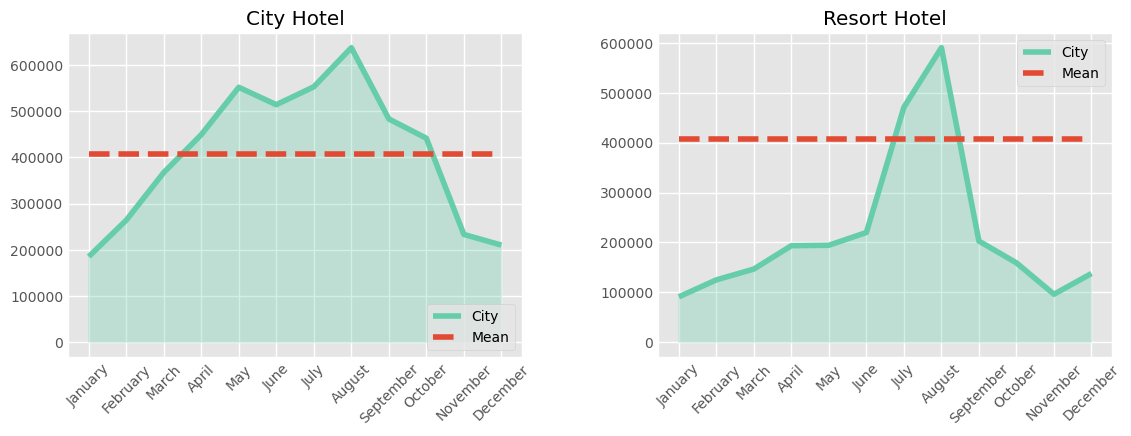

In [15]:
fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3) 

ax[0].plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['Check-Out'], color=greyn , label='City') 
ax[0].fill_between(tb_arrival_city['arrival_date_month'] , tb_arrival_city['Check-Out'], color=[greyn_main, greyn_01] ,  alpha=0.3) 
ax[0].plot(tb_arrival_city['arrival_date_month'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 

ax[1].plot(tb_arrival_resort['arrival_date_month'] , tb_arrival_resort['Check-Out'], color=greyn , label='City') 
ax[1].fill_between(tb_arrival_resort['arrival_date_month'] , tb_arrival_resort['Check-Out'], color=[greyn_main, greyn_01] ,  alpha=0.3) 
ax[1].plot(tb_arrival_resort['arrival_date_month'] , tb_arrival_city['mean'] , linestyle='--', label='Mean') 
ax[0].set_title('City Hotel') 

ax[1].set_title('Resort Hotel') 
# plt.xticks(rotation=45)
ax[0].tick_params(axis='x', which='both', labelrotation=45)
ax[1].tick_params(axis='x', which='both', labelrotation=45)
ax[0].legend(loc='lower right') 
ax[1].legend()




([<matplotlib.patches.Wedge at 0x2617bf9b650>,
 [Text(-0.3373603166819871, 1.0469899792873998, 'A'),
  Text(-0.8314666421674314, -0.7201827705262165, 'B'),
  Text(-0.7556236108584631, -0.7993953707104001, 'C'),
  Text(0.05470419857686236, -1.09863890822147, 'D'),
  Text(0.9210487494825041, -0.6013893922216416, 'E'),
  Text(1.0538512917212401, -0.3152736191587773, 'F'),
  Text(1.096212563976022, -0.09120315006136645, 'G'),
  Text(1.0999548940615738, -0.00996147729969379, 'K'),
  Text(1.099999999999907, -4.521879780868405e-07, 'P')],
 [Text(-0.18401471819017476, 0.5710854432476725, '59.9%'),
  Text(-0.4535272593640534, -0.39282696574157255, '2.9%'),
  Text(-0.41215833319552525, -0.43603383856930916, '0.3%'),
  Text(0.029838653769197646, -0.5992575863026199, '25.4%'),
  Text(0.5023902269904568, -0.32803057757544085, '4.6%'),
  Text(0.5748279773024946, -0.1719674286320603, '4.5%'),
  Text(0.5979341258051029, -0.04974717276074533, '2.1%'),
  Text(0.5999753967608583, -0.005433533072560249, '

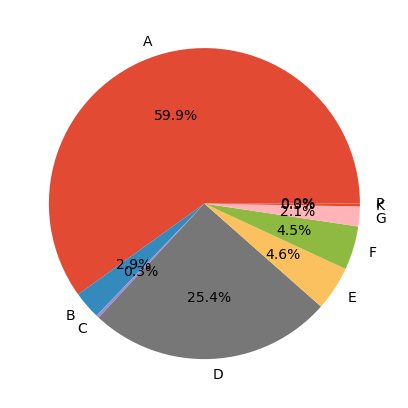

In [16]:
tb_room_resort = filter_book_resort.pivot_table(index='assigned_room_type' , values='adr' , columns='reservation_status', aggfunc='sum')
tb_room_resort = tb_room_resort.reset_index()
tb_room_resort

tb_room_city = filter_book_city.pivot_table(index='assigned_room_type' , values='adr' , columns='reservation_status', aggfunc='sum')
tb_room_city = tb_room_city.reset_index()

# tb_room_cty 

tb_room_city['Check-Out'] = tb_room_city['Check-Out'].fillna(0) 
# print(tb_room_city['Check-Out'].isna().sum())   
plt.pie(tb_room_city['Check-Out']    , labels=tb_room_city['assigned_room_type'] ,  autopct='%1.1f%%' )

# print(tb_room_city['Check-Out'].isna().su 

# if tb_room_['Check-Out'].isna() 
# print(tb_room_city['Check-Out'].isna().sum()
# plt.pie(tb_room_city['assigned_room_type']    , labels=tb_room_city['Check-Out'])
# tb_room_resort.dtypes
# tb_room_city.dtypes
#


In [17]:
# tb_weekday = filter_book_resort.pivot_table(index='date_status' , values='adr' , columns=['stays_in_week_nights' , 'stays_in_weekend_nights'] , aggfunc='sum')


tb_weekday = filter_book_resort.pivot_table(index='date_status' ,   values=['stays_in_week_nights' , 'stays_in_weekend_nights'] , columns='reservation_status' , aggfunc='sum')
tb_weekday = tb_weekday.reset_index()
# display(tb_weekday.head() )

tb_weekday_city = filter_book_city.pivot_table(index='date_status' ,   values=['stays_in_week_nights' , 'stays_in_weekend_nights'] , columns='reservation_status' , aggfunc='sum')
tb_weekday_city = tb_weekday_city.reset_index() 
# display(tb_weekday_city.head()) 
# tb_weekday = order_month()
# tb_weekday_city
# tb_weekday = func_ordering_dateS(tb_weekday)
# display(tb_weekday_city['stays_in_weekend_nights'])



# pd merging

date_status stays_in_week_nights                    \
reservation_status                         Canceled Check-Out No-Show   
0                        April                 3216      7366      21   
1                       August                 2511     12047      75   
2                     December                 2605      3778      64   
3                     February                 3561      4531      87   
4                      January                 4638      4461      52   

                   stays_in_weekend_nights                    
reservation_status                Canceled Check-Out No-Show  
0                                     1223      2580      10  
1                                      970      4771      30  
2                                      958      1499      14  
3                                     1311      1769      32  
4                                     1735      1363      14

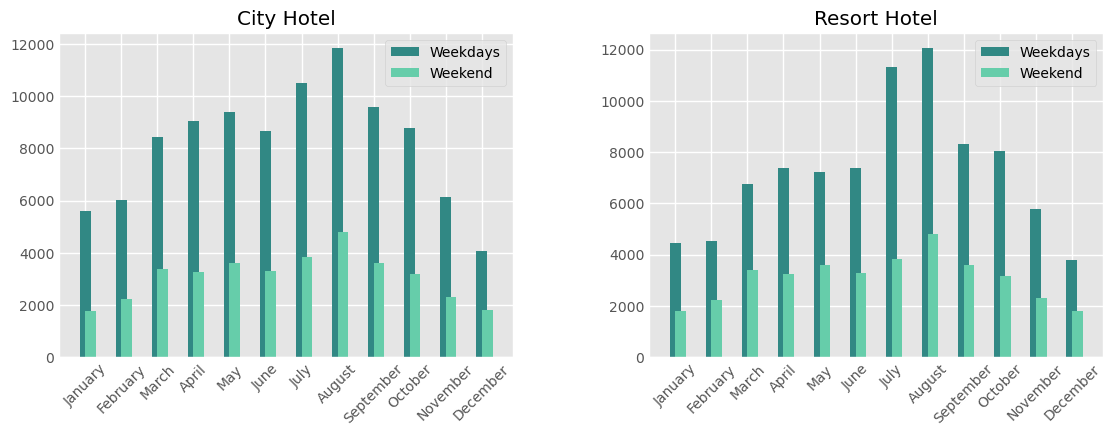

In [18]:

tb_weekday = filter_book_resort.pivot_table(index='date_status' ,   values=['stays_in_week_nights' , 'stays_in_weekend_nights'] , columns='reservation_status' , aggfunc='sum')
tb_weekday = tb_weekday.reset_index()
# display(tb_weekday.head() )

tb_weekday_city = filter_book_city.pivot_table(index='date_status' ,   values=['stays_in_week_nights' , 'stays_in_weekend_nights'] , columns='reservation_status' , aggfunc='sum')
tb_weekday_city = tb_weekday_city.reset_index() 

# tb_weekday['stays_in_week_nights']['mean'] = tb_weekday['stays_in_week_nights']['Check-Out'].mean()
# tb_weekday['mea'] = tb_weekday['stays_in_week_nights']['Check-Out'].mean()
# INITIALIZINT m
tb_months_resort = tb_weekday['date_status']
tb_months_city = tb_weekday_city['date_status'] 

tb_week_nights_resort = tb_weekday['stays_in_week_nights'] 
tb_weekend_nights_resort = tb_weekday['stays_in_weekend_nights'] 

tb_week_nights_city = tb_weekday_city['stays_in_week_nights']  
tb_weekend_nights_city = tb_weekday_city['stays_in_weekend_nights']  

# MERGIN
tb_merge_weeks_resort = pd.merge(tb_week_nights_resort , tb_months_resort, left_index=True , right_index=True) 
tb_merge_weekend_resort = pd.merge(tb_weekend_nights_resort , tb_months_resort, left_index=True , right_index=True) 
# tb_merge_weeks_resort = pd.merge(tb_merge_weeks_resort ,  )
tb_merge_weeks_city = pd.merge(tb_week_nights_city , tb_months_city, left_index=True , right_index=True)  
tb_merge_weekend_city = pd.merge(tb_weekend_nights_city , tb_months_city, left_index=True , right_index=True)  
# tb_merge_weekend_city
# display(tb_week_nights_resort )

# tb_merge_weeks_resort
# display(tb_week_nights_resort)
# display(tb_weekend_nights_resort) 

# ORDERING BY FUNCTION I CREATED
tb_merge_weeks_city = func_ordering_dateS(tb_merge_weeks_city) 
tb_merge_weekend_city = func_ordering_dateS(tb_merge_weekend_city) 
tb_merge_weeks_resort = func_ordering_dateS(tb_merge_weeks_resort) 
tb_merge_weekend_resort = func_ordering_dateS(tb_merge_weekend_city) 


display(tb_weekday.head())
# display(tb_merge_weeks_resort ) 
# display(tb_merge_weekend_resort)


fig, ax = plt.subplots(1, 2 , figsize=(12,4)) 
plt.subplots_adjust(wspace=0.3) 
# ax[0].bar(tb_merge_weeks_resort['date_status'] , tb_merge_weeks_resort['Check-Out'], color=greyn , label='City') 

indx_city = np.arange(len(tb_merge_weeks_city['date_status']))
indx_city_end = np.arange(len(tb_merge_weekend_city['date_status']))

indx_resort = np.arange(len(tb_merge_weeks_resort['date_status']))
indx_resort_end = np.arange(len(tb_merge_weekend_resort['date_status']))
# indx_resort = np.arange(len(tb_merge_weeks_resort['date_status']))
bar_width = 0.3 

ax[0].bar(indx_city , tb_merge_weeks_city['Check-Out'], color=greyn_01 , label='Weekdays' , width=bar_width)  
ax[0].bar(indx_city_end+bar_width/2, tb_merge_weekend_city['Check-Out'] , color=greyn , label='Weekend', width=bar_width)    

ax[1].bar(indx_resort , tb_merge_weeks_resort['Check-Out'], color=greyn_01 , label='Weekdays' , width=bar_width)  
ax[1].bar(indx_resort_end+bar_width/2, tb_merge_weekend_resort['Check-Out'] , color=greyn , label='Weekend', width=bar_width)    
# ax[1].barh(tb_merge_weeks_resort['date_status'] , tb_merge_weeks_resort['Check-Out'], color=greyn , label='Resort') 
ax[0].set_title('City Hotel')  
ax[1].set_title('Resort Hotel')  
ax[0].tick_params(axis='x', which='both', labelrotation=45)
ax[1].tick_params(axis="x", which='both', labelrotation=45)


ax[0].set_xticks(indx_city)
# sampol = func_ordering_dateS_samp(tb_merge_weeks_city)
# ax[0].set_xticklabels(tb_weekday['date_status'])
ax[0].set_xticklabels(tb_merge_weeks_city['date_status'])
ax[1].set_xticks(indx_resort)
ax[1].set_xticklabels(tb_merge_weeks_resort['date_status'])

# ax.set_xticks(indx)
# ax.set_xticklabels(fruits)
# ax[1].
ax[0].legend(loc='upper right') 
ax[1].legend(loc='upper right') 

[ 5 22 43  7 28]
['Mango', 'Pineapple', 'Papaya', 'Banana', 'Coconut']


[Text(0, 0, 'Mango'),
 Text(1, 0, 'Pineapple'),
 Text(2, 0, 'Papaya'),
 Text(3, 0, 'Banana'),
 Text(4, 0, 'Coconut')]

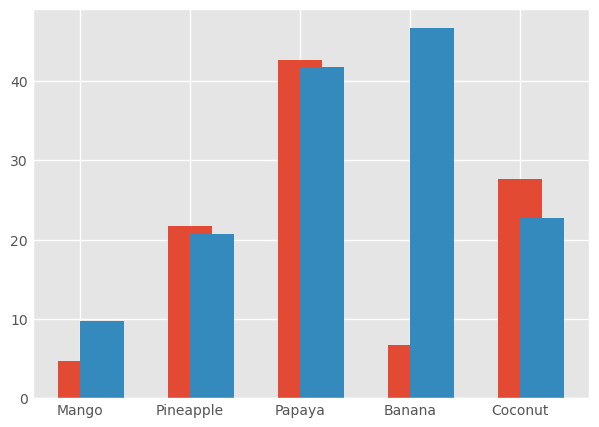

In [19]:
# frames = []

fig, ax = plt.subplots() 


np.random.seed(8)
frame_1 = np.random.randint(2,50, 5 )
frame_2 = np.random.randint(2,50, 5 )

fruits = ["Mango", "Pineapple", "Papaya", "Banana", "Coconut"] 
# citrus_fruits = ["Orange", "Lemon", "Lime", "Grapefruit", "Tangerine"]

bar_width = 0.4

indx = np.arange(len(fruits))
# print(indx)


print(frame_1) 
print(fruits) 

# plt.bar( frame_1 , fruits   , width=0.4)
# plt.bar( frame_2 , fruits   , width=0.4)s
plt.bar(indx, frame_1+-0.3 , width=bar_width)
plt.bar(indx + bar_width/2  , frame_2+-0.3 , width=bar_width)
ax.set_xticks(indx)
ax.set_xticklabels(fruits)
 
# print(frame_2)



# Stratch with bugs 

,arrival_date_month,hotel
0,January,5929
1,February,8068
2,March,9794
3,April,11089
4,May,11791
5,June,10939
6,July,12661
7,August,13877
8,September,10508
9,October,11160


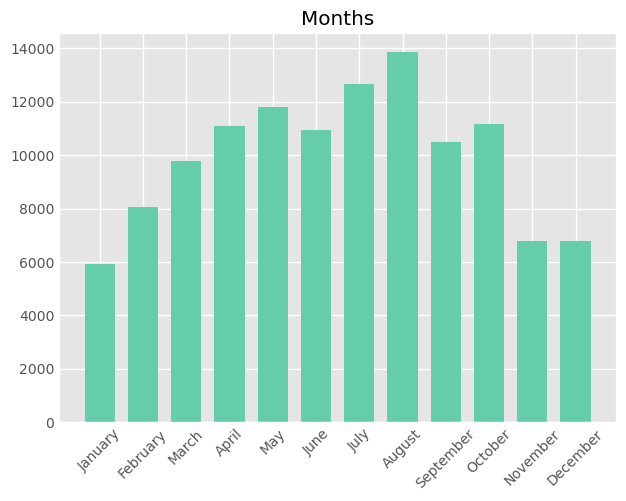

In [20]:
# SINCE IT THE MONTH ARE UNORDER I FIND SOME FUCKING SOLUtioN TO SOLVE THIS ONE

montly = df_book.pivot_table(values="hotel" , index='arrival_date_month' , aggfunc='count' )
# montly = df_book.pivot_table(values= "hotel" , index=None, aggfunc='mean'  )
df_motly = pd.DataFrame(montly) 
df_motly = df_motly.reset_index()  
# display(df_motly)


#initialize the order and the dataframe might use
order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
tb_ordered = pd.DataFrame([{
    'arrival_date_month' : '', 
    'hotel' : '' 
}])

for order in order_month:
    querys = df_motly.query("arrival_date_month ==  @order " )
    # querys = querys.reset_index()
    tb_ordered = pd.concat([tb_ordered , querys] , ignore_index=True)
    
    # display(querys) 

# tb_ordered = tb_ordered()
# display(tb_ordered) 

# DELETE THE empty table adn indexx
tb_ordered= tb_ordered.query("hotel != ''").reset_index(drop=True)
# tb_ordered = tb_ordered.set_index('arrival_date_month') 
display(tb_ordered) 

greyn = '#66cdaa'
## Vizualising this shit now
plt.style.use('ggplot')
plt.bar(tb_ordered['arrival_date_month'] ,  tb_ordered['hotel'] , color=greyn , width=0.7)
plt.title("Months")
plt.xticks(rotation=45)
plt.subplots_adjust(wspace= 200)
plt.show()


In [21]:
# gagi = tb_ordered[tb_ordered['hotel'] == '']  
# gagi

sampol = tb_ordered.query("arrival_date_month != ''") 
# df_dropp = tb_ordered.drop('March' , axis=0) 
# df_dropp
sampol = sampol.reset_index(drop=True)

# sampol
# tb_ordered


In [22]:
# months = ['July', 'September', 'January', 'March', 'December', 'April', 'May', 'October', 'August', 'November', 'February', 'June']

# Define a function to extract the month's numerical position
# def get_month_index(month):
    # month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#     # print( month_order.index(month))
#     # returnt() 

mon = pd.DataFrame({
    "month" : [ 'July' , 'September', 'January', 'March', 'December', 'April', 'May', 'October', 'August', 'November', 'February', 'June' ], 
    "color" : ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink', 'Brown', 'Black', 'White', 'Gray', 'Cyan']
})

mon 


# new_Row =  pd.DataFrame([{'month': '' ,  'color' : ''}])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mon = pd.concat([mon , new_Row] , ignore_index=True) 

# mon

init_mon = {"month":  "" , 'color' : ""} 
# init_mon 

new_month = pd.DataFrame([init_mon])
new_month 
# for month_or in month_order : 
#     # print(month_or) 
#     if month_or == 



NameError: name 'new_Row' is not defined

In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 22, 28],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}

df = pd.DataFrame(data)

# Select rows where 'Name' is 'Alice' or 'Bob'
 


# selected_rows = df.loc[ [2] , ['Age']] # Using a list of row labels (index names) 
# print(selected_rows ==  ) 

# order_name = ['Bob' , 'Name' , 'David' ,  'Charlie']
# def orderings(selected): 
#     # print(selected =='Bob')
#     for x in order_name:  
#         # print)a
#         # print(x)
#         if x == selected:
#             print("match")
#         # else : 
        #     print("not exist")


 
 
# for x in range(len(df)): 
#     selected_rows = df.loc[ x , ['Name']]
    
#     # if .any()  :
#         # print('has mtch')
#     # print(selected_rows == '')
#     # display(selected_rows) 
#     # Using a list of row labels (index names) 
#     # if selected_rows == order_name[x] : 
#     #     print('match')
display(df)

# name = 'Bob'


init_name = pd.DataFrame([{
    'Name' : '' , 
    'Age'  :  '' , 
    'City' : ''
}])


display(init_name)

order_name = ['Bob' , 'Alice' , 'David' ,  'Charlie']
for order in order_name :
    filter_df = df.query("Name == @order")
    init_name = pd.concat([init_name , filter_df] , ignore_index=True)
    # display(filter_df)


display(init_name)



